### Plot scattering angle of k+ as a function of its momentum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Known values
kl_p_series = pd.Series([0.2, 0.3, 0.4, 0.5, 0.6]) # klong_p
kp_p_series = pd.Series(np.linspace(0.001, 0.20, 1000)) # kplus_p
n_m = 0.939 # neutron_m
kl_m = 0.4976 # kLong_m
kp_m = 0.4976 # kPlus_m
p_m = 0.938 # proton_m

# Function definitions
def kl_e(kl_p, kl_m): # klong_e
    return np.sqrt(kl_p**2 + kl_m**2)

def kp_e(kp_p, kp_m): # kplus_e
    return np.sqrt(kp_p**2 + kp_m**2)

def n_e(kl_e, kp_e, p_m): # neutron_e
    return (kl_e + p_m - kp_e)

# Creates a multi-index list which will be used in the dataframe
multi_index = pd.MultiIndex.from_product([kl_p_series, kp_p_series], names=['klong_p', 'kplus_p'])
# Creates an empty dataframe using the multi-index
df = pd.DataFrame(columns=['Theta'], index=multi_index)

# Loop through the klong_p values and calculate the theta values for each kplus_p value.  Store the theta values in the dataframe.
for i in kl_p_series:
    kl_e_value = kl_e(i, kl_m)
    
    for j in kp_p_series:
        kp_e_value = kp_e(j, kp_m)
        n_e_value = n_e(kl_e_value, kp_e_value, p_m)
        
        cosTheta = np.cos((kl_p**2 + j**2 + n_m**2 - n_e_value) / (2 * kl_p * j))
        theta = np.degrees(np.arccos(cosTheta))

        df.loc[(i, j), 'Theta'] = theta
    
    sub_df = df.loc[i]  # Create a sub-dataframe for each klong_p value (in other words, the current loop's 'i' value)
    plt.plot(kp_p_series, sub_df['Theta'], label=f'klong_p = {kl_p}') # Plot the sub-dataframe's theta values against the kplus_p values

# for debugging, to see what the data in the dataframe looks like
print(df)

plt.xlabel('kplus_p')
plt.ylabel('Theta (degrees)')
plt.legend()
plt.show()


### Use moskov's 4-vector values

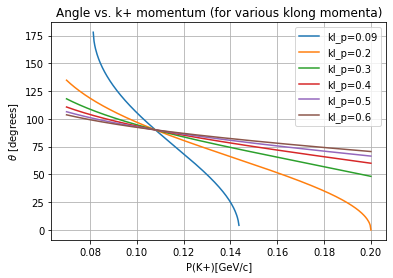

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Note: rewrite this code to use the dataframe from above instead of the series below.
# Note: rewrite this code making all the values in the function pre-defined as functions that ultimately get passed to the arccos function.

# Define the function
def f(x, kl_p_value):
    numerator = -(0.497**2 + np.sqrt(0.2**2 + 0.497**2)*0.938 - np.sqrt(0.2**2 + 0.497**2)*np.sqrt(x**2 + 0.497**2) - np.sqrt(x**2 + 0.497**2)*0.938)
    denominator = kl_p_value * x
    ratio = numerator / denominator

    # Set any values of cosine that are outside range [-1, 1] to nan
    ratio[(ratio < -1) | (ratio > 1)] = np.nan

    return np.arccos(ratio) * 180. / 3.14


# Define the x-values range and step size
x = np.linspace(0.07, 0.2, 400)

# Series of kLong momentums.  Each will be plotted separately on same graph.
kl_p_series = pd.Series([0.09, 0.2, 0.3, 0.4, 0.5, 0.6])

# Loop through above kLong momentums.
for kl_p_value in kl_p_series:
    y = f(x, kl_p_value)
    plt.plot(x, y, label=f'kl_p={kl_p_value}')

# Plot all on the same graph
plt.xlabel('P(K+)[GeV/c]')
plt.ylabel(r'$\theta$ [degrees]')
plt.title('Angle vs. k+ momentum (for various klong momenta)')
plt.legend()  # To show the legend with kl_p values
plt.grid(True)
plt.show()
